In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
tqdm.pandas()

from astropy.coordinates import SkyCoord
import astropy.units as u

In [42]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
orig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/data'

## Getting the Data

In [3]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)
df_cat.head()

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,0.000002,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-0.000010,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279


In [4]:
or_sample = pd.read_csv(f'{orig_folder}/interacting-catalogue.csv', index_col = 0)
or_sample.head()

,SourceID,RA,Dec,int_prediction,references,status
0,4000704963129,187.983807,58.010524,0.958096,No_entry,Unreferenced
1,4000704963271,187.980323,58.026481,0.966350,No_entry,Unreferenced
2,4000704963422,187.938181,58.039949,0.956150,No_entry,Unreferenced
3,4000705131622,217.216271,34.015278,0.987888,No_entry,Unreferenced
4,4000705131630,217.207839,34.015576,0.984174,No_entry,Unreferenced


## Conductiong Matching

In [5]:
df_cat_red = df_cat[['ORyanID_23','ID','ALPHA_J2000','DELTA_J2000']].rename(columns = {'ORyanID_23' : 'SourceID'})

In [6]:
df_merge = df_cat_red.merge(or_sample[['SourceID', 'RA', 'Dec']], on = 'SourceID', how = 'left').dropna()
df_merge.head()

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec
0,4000705532455,816891,150.679846,2.196543,150.679664,2.196615
1,4000705533383,860686,150.644522,2.237226,150.645125,2.237650
2,4000705539941,1301188,149.702462,2.654895,149.702652,2.654624
3,4000705540034,1304538,149.726828,2.658172,149.727017,2.658066
4,4000705540064,1310001,149.701230,2.660343,149.701495,2.660271


In [8]:
len(df_merge)

3072

In [9]:
df_merge.drop_duplicates('SourceID', keep = 'first')

,SourceID,ID,ALPHA_J2000,DELTA_J2000,RA,Dec
0,4000705532455,816891,150.679846,2.196543,150.679664,2.196615
1,4000705533383,860686,150.644522,2.237226,150.645125,2.237650
2,4000705539941,1301188,149.702462,2.654895,149.702652,2.654624
3,4000705540034,1304538,149.726828,2.658172,149.727017,2.658066
4,4000705540064,1310001,149.701230,2.660343,149.701495,2.660271
...,...,...,...,...,...,...
2560,4001111524196,991056,150.407247,2.356121,150.406927,2.355820
2561,4001185627710,1294479,149.998094,2.651083,149.997831,2.651329
2562,6000508613553,1140076,150.610964,2.494102,150.610729,2.494162
2563,6000518662663,575198,150.421018,1.984436,150.421572,1.985231


In [10]:
def calc_sep(cosmos_ra, cosmos_dec, ra, dec):
    coord_cosmos = SkyCoord(ra = cosmos_ra * u.deg, dec = cosmos_dec * u.deg, frame = 'fk5')
    coord = SkyCoord(ra = ra * u.deg, dec = dec * u.deg, frame = 'fk5')
    
    sep = coord_cosmos.separation(coord).to(u.arcsec)
    
    return sep.value

In [13]:
df_seps = (
    df_merge
    .assign(
        sep = df_merge.progress_apply(lambda row: calc_sep(row.ALPHA_J2000, row.DELTA_J2000, row.RA, row.Dec), axis = 1)
    )
)

100%|██████████| 3072/3072 [00:07<00:00, 418.99it/s]


In [22]:
df_seps_dedup = df_seps.sort_values('sep', ascending=True).drop_duplicates('SourceID', keep='first')

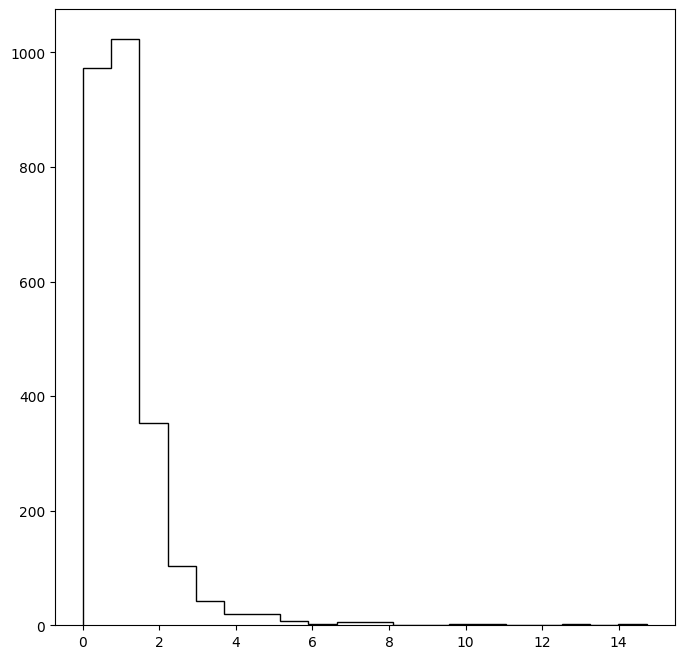

In [23]:
plt.figure(figsize = (8,8))
plt.hist(df_seps_dedup.sep, bins = 20, histtype = 'step', color = 'black')
plt.show()

## Checking Large Separations

In [30]:
df_vis_clsf = (
    pd.read_csv(f'{data_folder}/secondaries-identified.csv', index_col = 0)
    .reset_index()
    .rename(columns = {'index' : 'SourceID', '0' : 'vis_clsf'})
)
df_vis_clsf.head()

,SourceID,vis_clsf
0,4000705532455,n
1,4000705532984,nm
2,4000705533312,y
3,4000705533383,n
4,4000705539435,l


In [31]:
len(df_seps)

3072

In [33]:
df_seps_clsf = df_seps_dedup.merge(df_vis_clsf, on = 'SourceID', how = 'left')

In [39]:
df_rem = df_seps_clsf.query('sep > 3.5').vis_clsf.value_counts()

In [59]:
df_seps_clsf.vis_clsf.value_counts()

n    2117
y     778
b     176
m       1
Name: vis_clsf, dtype: int64

In [69]:
res = ['n','y','b']
color = ['black','blue','red']

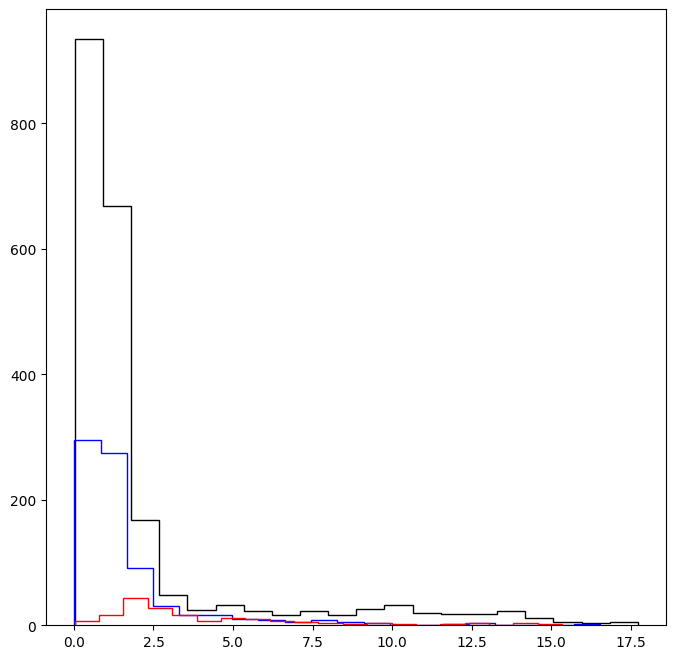

In [70]:
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,8))
for counter, i in enumerate(res):
    df_tmp = df_seps_clsf.query('vis_clsf == @i')
    ax.hist(df_tmp.sep, bins = 20, histtype = 'step', color = color[counter])
plt.show()

In [40]:
df_rem

n    50
b    19
y    13
Name: vis_clsf, dtype: int64